In [36]:
import pandas as pd
import numpy as np
import torch
import pickle

#Load Static testing and training data
with open('static_data/train.pickle','rb') as handle:
    train_indices = pickle.load(handle)

with open('static_data/test.pickle','rb') as handle:
    test_indices = pickle.load(handle)

In [39]:
df = pd.read_csv("data/chest_xray_train.csv")

In [40]:
# get all pixel columns
selected_features = list(df.columns)
selected_features.remove("file_name")
selected_features.remove("class_id")

# Set train and target
X = df[selected_features]
y = df['class_id']

# Get training and test data
X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:] 
y_train, y_test = y[train_indices], y[test_indices]

In [41]:
X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:] 
y_train, y_test = y[train_indices], y[test_indices]

In [46]:
train_tensor = torch.tensor(X_train.values, dtype= torch.int16)
test_tensor = torch.tensor(y_test.values, dtype = torch.int16)

In [47]:
train_tensor

tensor([[  4,   3,   3,  ...,   0,   0,   0],
        [  0,  13,  45,  ...,   0,   0,   0],
        [ 20,  20,  20,  ...,  20,  20,  20],
        ...,
        [ 92, 102, 179,  ...,  23,  24,  23],
        [ 52,  65,  73,  ...,   0,   0,   0],
        [ 10,  23,  62,  ...,  24,  26,  37]], dtype=torch.int16)

In [48]:
train_tensor.shape

torch.Size([4205, 4096])

In [49]:
test_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2,
        1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1,
        1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1,
        2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1,
        1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1,
        0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0,
        1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1,

In [50]:
test_tensor.shape

torch.Size([467])

In [ ]:
#Custom dataset

In [51]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms.functional import to_pil_image, pil_to_tensor
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
from torchvision.io import read_image

from PIL import Image
from PIL import ImageOps

class ChestxrayImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=pil_transform_tensor, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [52]:
img_dir = "C:\\Users\\conor\\OneDrive\\Desktop\\school\\Data Science Minor Independent Study\\chest-xray-research\\archive\\train_images\\train_images"
annotations_file = "C:\\Users\\conor\\OneDrive\\Desktop\\school\\Data Science Minor Independent Study\\chest-xray-research\\archive\\labels_train.csv"

In [56]:
chest_dataset = ChestxrayImageDataset(annotations_file=annotations_file, img_dir=img_dir)

In [58]:
chest_dataset.__getitem__(2)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [1]:
# PIL method
test_img = chest_dataset.__getitem__(2) # get second image in labels list
test_img[0][0].shape # access image in tensor
test_img = test_img[0][0] # image
test_img.shape
test_img = np.array(test_img) # turn to np array
test_pil_img = to_pil_image(test_img) # turn to pil and rescale
img_gray = ImageOps.grayscale(test_pil_img)
image_resized = img_gray.resize((64,64), Image.LANCZOS)
image_resized
image_resized_tensor = pil_to_tensor(image_resized) # turn back into tensor
image_resized_tensor
image_resized_tensor[0]
# plt.figure(figsize=(10,10))
# plt.imshow(image_resized_tensor[0])
# plt.show()

NameError: name 'chest_dataset' is not defined

In [55]:
def pil_transform_tensor(tensor_img):
    # test_img = chest_dataset.__getitem__(2) # get second image in labels list
    # test_img[0][0].shape # access image in tensor
    test_img = test_img[0][0] # image
    # test_img.shape
    test_img = np.array(test_img) # turn to np array
    test_pil_img = to_pil_image(test_img) # turn to pil and rescale
    img_gray = ImageOps.grayscale(test_pil_img)
    image_resized = img_gray.resize((64,64), Image.LANCZOS)
    # image_resized
    image_resized_tensor = pil_to_tensor(image_resized) # turn back into tensor
    # image_resized_tensor
    return image_resized_tensor

torch.Size([1, 64, 64])

In [70]:
#tutorial data loading
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import math
import pickle

class ChestXRayDataset(Dataset):

    def __init__(self,train):
        # df = pd.read_csv('./data/chest_xray_train.csv')
        
        #Load Static testing and training data indices
        
        with open('static_data/train.pickle','rb') as handle:
            train_indices = pickle.load(handle)
        
        with open('static_data/test.pickle','rb') as handle:
            test_indices = pickle.load(handle)

        # # get all pixel columns
        # selected_features = list(df.columns)
        # selected_features.remove("file_name")
        # selected_features.remove("class_id")
        
        # # Set train and target
        # X = df[selected_features]
        # y = df['class_id']
        
        # # Get training and test data
        # X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:] 
        # y_train, y_test = y[train_indices], y[test_indices]

        # # Turn into np arrays 
        # X_train_np = X_train.to_numpy(dtype=np.int16, copy = True)
        # y_test_np = y_test.to_numpy(dtype=np.int16, copy = True)

        # # Turn into PyTorch Sensors
        # X_train_torch = torch.from_numpy(X_train_np)
        # y_test_torch = torch.from_numpy(y_test_np)

        # self.X = X_train_torch
        # self.y = y_test_torch


        df = pd.read_csv('data/chest_xray_train.csv')

        df = df.drop(columns = ["file_name"]) # unnecessary column
        
        # if train == True:
        #     X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:] 
        # else:
        #     y_train, y_test = y.iloc[train_indices], y[test_indices]
        
        columns_len = len(df.columns) # Get number of columns in dataframe
        print(columns_len)
        
        # We have to get the first image in order to initalize array
        first_img = df.iloc[0,0:columns_len-1].to_numpy()
        first_img = np.resize(first_img,(64,64))
        
        # Get first class to initalize array
        second = df.loc[0,"class_id"]
        
        df_X = np.array([first_img],dtype=np.int16) # Image Tensor
        
        df_y = np.array([second],dtype=np.int16) # Class Array
        
        for row in range(1,len(df)):
            
            flattened_img = df.iloc[row,0:columns_len-1].to_numpy() # skip class_id
            class_id = df.loc[row,"class_id"] # get class_id
            matrix_img = np.resize(flattened_img,(64,64)) # turn flattened image back into 2d image
        
        
            df_X = np.append(df_X, [matrix_img],axis = 0) # append image
            df_y = np.append(df_y, class_id) # append class

        if train == True:
            df_X, df_y = df_X[train_indices], df_y[train_indices] #X_train, y_train
            df_y = torch.from_numpy(df_y)
        else:
            df_X, df_y = df_X[test_indices], df_y[test_indices] #y_train, y_test
            df_y = torch.from_numpy(df_y)
            
        X_torch = torch.from_numpy(df_X)
        # y_torch = torch.from_numpy(df_y)

        self.X = X_torch
        # self.y = y_torch
        self.y = df_y

    def __getitem__(self,index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.y.shape[0]

In [10]:
df = pd.read_csv('data/chest_xray_train.csv')

In [12]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file_name,class_id
0,4,3,3,2,1,0,0,0,0,2,...,108,41,0,0,0,0,0,0,img_1002194571005371555.jpg,1
1,0,13,45,71,86,95,109,103,94,96,...,99,33,0,0,0,0,0,0,img_1002972834724824498.jpg,1
2,20,20,20,20,20,20,20,20,20,20,...,53,13,21,20,20,20,20,20,img_1004160693662088646.jpg,0
3,1,11,27,49,83,107,118,123,131,140,...,149,135,112,99,65,32,10,0,img_1011159426506457600.jpg,2
4,47,77,117,79,140,64,55,62,69,67,...,136,117,68,51,36,17,27,36,img_1014387197248837154.jpg,1


In [2]:
import pickle

#Load Static testing and training data
with open('static_data/train.pickle','rb') as handle:
    train_indices = pickle.load(handle)

with open('static_data/test.pickle','rb') as handle:
    test_indices = pickle.load(handle)

In [14]:
# get all pixel columns
selected_features = list(df.columns)
selected_features.remove("file_name")
selected_features.remove("class_id")

# Set train and target
X = df[selected_features]
y = df['class_id']

# Get training and test data
X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:] 
y_train, y_test = y[train_indices], y[test_indices]

In [25]:
X_train_np = X_train.to_numpy(dtype=np.int16, copy = True)

In [26]:
X_train_np.shape

(4205, 4096)

In [29]:
y_test_np = y_test.to_numpy(dtype=np.int16, copy = True)

In [31]:
y_test_np.shape

(467,)

In [32]:
X_train_torch = torch.from_numpy(X_train_np)

In [34]:
X_train_torch.shape

torch.Size([4205, 4096])

In [35]:
y_test_torch = torch.from_numpy(y_test_np)

In [37]:
y_test_torch.shape

torch.Size([467])

In [3]:
chest_dataset = ChestXRayDataset()

4097


KeyboardInterrupt: 

In [ ]:
chest_dataset.y.shape

In [ ]:
train_dataloader = DataLoader(dataset = chest_dataset, batch_size = 100, shuffle = True, num_workers = 2)
test_dataloader = DataLoader(dataset = chest_dataset, batch_size = 5000, num_workers = 2)

In [47]:
#Turn pandas df into np array
#dimensions [[64,64],1] [[64x64 image], class_id]
df = pd.read_csv('data/chest_xray_train.csv')

In [50]:
df_np = np.array([],dtype=np.int16)

In [51]:
df_np

array([], dtype=int16)

In [53]:
df = df.drop(columns = ["file_name"]) # unnecessary column

In [67]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,class_id
0,4,3,3,2,1,0,0,0,0,2,...,135,108,41,0,0,0,0,0,0,1
1,0,13,45,71,86,95,109,103,94,96,...,129,99,33,0,0,0,0,0,0,1
2,20,20,20,20,20,20,20,20,20,20,...,110,53,13,21,20,20,20,20,20,0
3,1,11,27,49,83,107,118,123,131,140,...,130,149,135,112,99,65,32,10,0,2
4,47,77,117,79,140,64,55,62,69,67,...,138,136,117,68,51,36,17,27,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,203,186,167,63,30,35,41,52,51,50,...,86,95,77,48,17,9,15,16,18,1
4668,88,90,93,103,115,126,121,126,128,129,...,192,186,177,161,124,60,36,48,51,1
4669,92,102,179,120,73,73,83,83,74,67,...,99,51,10,17,22,24,23,24,23,1
4670,52,65,73,81,87,80,104,133,175,203,...,179,170,171,132,93,40,0,0,0,0


In [133]:

columns_len = len(df.columns) # Get number of columns in dataframe
print(columns_len)

# We have to get the first image in order to initalize array
first_img = df.iloc[0,0:columns_len-1].to_numpy()
first_img = np.resize(first_img,(64,64))

# Get first class to initalize array
second = df.loc[0,"class_id"]

df_X = np.array([first_img],dtype=np.int16) # Image Tensor

df_y = np.array([second],dtype=np.int16) # Class Array

for row in range(1,len(df)):
    
    flattened_img = df.iloc[row,0:columns_len-1].to_numpy() # skip class_id
    class_id = df.loc[row,"class_id"] # get class_id
    matrix_img = np.resize(flattened_img,(64,64)) # turn flattened image back into 2d image


    df_X = np.append(df_X, [matrix_img],axis = 0) # append image
    df_y = np.append(df_y, class_id) # append class

    
    

4097


In [134]:
df_X.shape

(4672, 64, 64)

In [136]:
df_y.shape

(4672,)

In [138]:
X_train, X_test = df_X[train_indices,:], df_X[test_indices,:] 
y_train, y_test = df_y[train_indices], df_y[test_indices]

In [139]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4205, 64, 64) (467, 64, 64) (4205,) (467,)


In [140]:
X_train_torch = torch.from_numpy(X_train)

In [141]:
X_train_torch.shape

torch.Size([4205, 64, 64])

In [142]:
X_test_torch = torch.from_numpy(X_test)
X_test_torch.shape

torch.Size([467, 64, 64])

In [144]:
X_test_torch

tensor([[[ 55,  63,  69,  ..., 153, 165, 138],
         [ 62,  72,  81,  ..., 156, 135, 117],
         [ 60,  80,  89,  ..., 139, 132, 116],
         ...,
         [  0,   0,   0,  ...,   0,   1,   0],
         [  0,   0,   0,  ...,   0,   1,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[ 38,  51,  56,  ...,  66,  46,  30],
         [ 37,  50,  55,  ...,  65,  46,  30],
         [ 35,  51,  58,  ...,  63,  46,  26],
         ...,
         [ 15,  12,  47,  ...,  22,  25,  24],
         [ 15,  12,  46,  ...,  23,  24,  24],
         [ 15,  12,  46,  ...,  23,  24,  25]],

        [[  0,   4,  31,  ...,  31,  19,   6],
         [  0,   2,  26,  ...,  39,  14,   1],
         [  0,   0,  21,  ...,  47,  14,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[ 62,  61,  62,  ..., 131, 157, 179],
         [ 57,  57,  57,  ..., 125, 165, 178]

In [4]:
#Testing New Class
chest_xray = ChestXRayDataset()

4097


In [5]:
len(chest_xray)

4672

In [6]:
chest_xray_train = chest_xray[train_indices]

In [7]:
print(chest_xray_train[0].shape, chest_xray_train[1].shape)

torch.Size([4205, 64, 64]) (4205,)


In [8]:
chest_xray_test = chest_xray[test_indices]

In [9]:
print(chest_xray_test[0].shape, chest_xray_test[1].shape)

torch.Size([467, 64, 64]) (467,)


In [45]:
train_dataloader = DataLoader(dataset = chest_xray_train, batch_size = 100, shuffle = True)

In [46]:
train_dataloader

In [47]:
train_dataiter = iter(train_dataloader)

In [48]:
dataiter = iter(train_dataloader)
data = next(dataiter)

RuntimeError: stack expects each tensor to be equal size, but got [4205] at entry 0 and [4205, 64, 64] at entry 1

In [ ]:
features, labels = data

In [26]:
features

tensor([[[ 65,  72,  86,  ...,  24,  19,  12],
         [ 74,  86,  86,  ...,  29,  25,  22],
         [ 78,  91,  94,  ...,  30,  28,  24],
         ...,
         [ 45,  43,  35,  ...,  44,  45,  46],
         [ 44,  44,  33,  ...,  45,  46,  46],
         [ 44,  43,  31,  ...,  45,  46,  46]],

        [[ 48,  61,  59,  ...,  61,  50,  30],
         [ 38,  58,  60,  ...,  57,  42,  19],
         [ 25,  52,  62,  ...,  51,  40,  15],
         ...,
         [  0,   0,   0,  ...,   4,   0,   0],
         [  0,   0,   0,  ...,   6,   0,   0],
         [  0,   0,   0,  ...,   9,   0,   0]],

        [[  8,  34,  51,  ..., 192, 195, 211],
         [ 12,  48,  48,  ..., 186, 189, 203],
         [ 39,  48,  49,  ..., 188, 191, 195],
         ...,
         [ 32,  30,  29,  ...,  28,  29,  33],
         [ 32,  30,  29,  ...,  28,  28,  32],
         [ 32,  30,  29,  ...,  28,  29,  31]],

        ...,

        [[122, 121, 141,  ...,   2,   6,  12],
         [146, 129, 118,  ...,  20,  26,  31]

In [32]:
for x,y in train_dataloader:
    print(x,y)
    break

tensor([[[  0,  17,  60,  ..., 121, 120,  93],
         [  0,  15,  57,  ..., 117, 111,  91],
         [  0,  13,  54,  ..., 118, 108,  87],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[ 19,  19,  15,  ...,  48,  45,  36],
         [ 20,  19,   3,  ...,  43,  45,  33],
         [ 16,  10,  16,  ...,  45,  37,  90],
         ...,
         [ 30,  29,  29,  ...,  28,  29,  30],
         [ 30,  30,  29,  ...,  28,  29,  30],
         [ 32,  29,  29,  ...,  29,  28,  32]],

        [[ 40,  44,  44,  ...,  16,  23,  14],
         [ 39,  43,  49,  ...,  14,  20,  14],
         [ 41,  46,  55,  ...,  11,  16,  16],
         ...,
         [ 26,  25,  18,  ...,  27,  27,  28],
         [ 26,  25,  17,  ...,  27,  27,  28],
         [ 25,  24,  16,  ...,  27,  28,  28]],

        ...,

        [[117, 115, 122,  ..., 102, 114, 132],
         [130, 123, 127,  ..., 110, 120, 128]

In [71]:
# Test if train = True and Train = False works
chest_xray = ChestXRayDataset(True)

4097


In [72]:
chest_xray.X.shape

torch.Size([4205, 64, 64])

In [73]:
chest_xray.y.shape

torch.Size([4205])

In [75]:
train_dataloader = DataLoader(dataset = chest_xray, batch_size = 100, shuffle = True)
dataiter = iter(train_dataloader)
data = next(dataiter)

In [80]:
data[0][0]

tensor([[20, 32, 41,  ..., 83, 80, 76],
        [32, 47, 58,  ..., 82, 75, 68],
        [39, 57, 72,  ..., 80, 71, 59],
        ...,
        [ 0,  0,  0,  ..., 17,  0,  1],
        [ 0,  0,  0,  ..., 23,  0,  1],
        [ 0,  0,  0,  ..., 27,  0,  1]])

In [86]:
for x,y in train_dataloader:
    print(x,y)
    print(x.shape, y.shape)
    break

tensor([[[ 31,  40,  53,  ...,  18,  23,  23],
         [ 35,  46,  60,  ...,  14,  16,  23],
         [ 37,  54,  69,  ...,  32,  14,  11],
         ...,
         [ 19,  13,  18,  ...,  22,  23,  24],
         [ 19,  13,  19,  ...,  23,  24,  25],
         [ 18,  13,  19,  ...,  24,  27,  25]],

        [[ 77,  83,  92,  ...,   0,   0,   0],
         [128, 101,  91,  ...,  10,  18,  27],
         [137, 150, 128,  ...,  45,  51,  57],
         ...,
         [  1,  25,  64,  ...,   2,   0,   0],
         [  2,  26,  74,  ...,   3,   0,   0],
         [  2,  28,  82,  ...,   5,   0,   0]],

        [[  0,   0,   4,  ...,   0,   0,   0],
         [  0,   0,   8,  ...,   0,   2,   0],
         [  0,   0,  14,  ...,   0,   5,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[ 55,  76,  93,  ...,  78,  73,  54],
         [ 52,  74,  89,  ...,  79,  69,  49]

In [90]:
chest_xray_validation = ChestXRayDataset(False)
print(chest_xray_validation.X.shape)
print(chest_xray_validation.y.shape)

torch.Size([467, 64, 64])
torch.Size([467])


In [89]:
validation_dataloader = DataLoader(dataset = chest_xray_validation, batch_size = 500)
valid_dataiter = iter(validation_dataloader)
valid_data = next(valid_dataiter)

In [97]:
for x,y in validation_dataloader:
    print(x,y)
    print(x.shape,y.shape)
    break

tensor([[[ 55,  63,  69,  ..., 153, 165, 138],
         [ 62,  72,  81,  ..., 156, 135, 117],
         [ 60,  80,  89,  ..., 139, 132, 116],
         ...,
         [  0,   0,   0,  ...,   0,   1,   0],
         [  0,   0,   0,  ...,   0,   1,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[ 38,  51,  56,  ...,  66,  46,  30],
         [ 37,  50,  55,  ...,  65,  46,  30],
         [ 35,  51,  58,  ...,  63,  46,  26],
         ...,
         [ 15,  12,  47,  ...,  22,  25,  24],
         [ 15,  12,  46,  ...,  23,  24,  24],
         [ 15,  12,  46,  ...,  23,  24,  25]],

        [[  0,   4,  31,  ...,  31,  19,   6],
         [  0,   2,  26,  ...,  39,  14,   1],
         [  0,   0,  21,  ...,  47,  14,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[ 62,  61,  62,  ..., 131, 157, 179],
         [ 57,  57,  57,  ..., 125, 165, 178]

In [98]:
#CNN please work time

In [99]:
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to download the dataset
import torchvision.datasets as dsets
# Used to graph data and loss curves
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np

In [100]:
# Define the function for plotting the channels

def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0
    
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
        if in_index > n_in-1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()


# Define the function for plotting the parameters

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()


# Define the function for plotting the activations

def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace = 0.9)    

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()


def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1].item()))

In [108]:
#tutorial data loading
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import math
import pickle

class ChestXRayDataset(Dataset):

    def __init__(self,train):
        # df = pd.read_csv('./data/chest_xray_train.csv')
        
        #Load Static testing and training data indices
        
        with open('static_data/train.pickle','rb') as handle:
            train_indices = pickle.load(handle)
        
        with open('static_data/test.pickle','rb') as handle:
            test_indices = pickle.load(handle)

        df = pd.read_csv('data/chest_xray_train.csv')

        df = df.drop(columns = ["file_name"]) # unnecessary column

        columns_len = len(df.columns) # Get number of columns in dataframe
        print(columns_len)
        
        # We have to get the first image in order to initalize array
        first_img = df.iloc[0,0:columns_len-1].to_numpy()
        first_img = np.resize(first_img,(64,64))
        
        # Get first class to initalize array
        second = df.loc[0,"class_id"]
        
        df_X = np.array([first_img],dtype=np.int16) # Image Tensor
        
        df_y = np.array([second],dtype=np.int16) # Class Array
        
        for row in range(1,len(df)):
            
            flattened_img = df.iloc[row,0:columns_len-1].to_numpy() # skip class_id
            class_id = df.loc[row,"class_id"] # get class_id
            matrix_img = np.resize(flattened_img,(64,64)) # turn flattened image back into 2d image

            df_X = df_X.astype(np.float32)
            df_y = df_y.astype(np.float32)
        
            df_X = np.append(df_X, [matrix_img],axis = 0) # append image
            df_y = np.append(df_y, class_id) # append class

        if train == True:
            df_X, df_y = df_X[train_indices], df_y[train_indices] #X_train, y_train
            df_y = torch.from_numpy(df_y)
        else:
            df_X, df_y = df_X[test_indices], df_y[test_indices] #y_train, y_test
            df_y = torch.from_numpy(df_y)
            
        X_torch = torch.from_numpy(df_X)
        # y_torch = torch.from_numpy(df_y)

        self.X = X_torch
        # self.y = y_torch
        self.y = df_y

    def __getitem__(self,index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.y.shape[0]

In [109]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        # The reason we start with 1 channel is because we have a single black and white image
        # Channel Width after this layer is 16
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        # Channel Wifth after this layer is 8
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        # Channel Width after this layer is 8
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        # Channel Width after this layer is 4
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        # In total we have out_2 (32) channels which are each 4 * 4 in size based on the width calculation above. Channels are squares.
        # The output is a value for each class
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        # Puts the X value through each cnn, relu, and pooling layer and it is flattened for input into the fully connected layer
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs result of each stage of the CNN, relu, and pooling layers
    def activations(self, x):
        # Outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

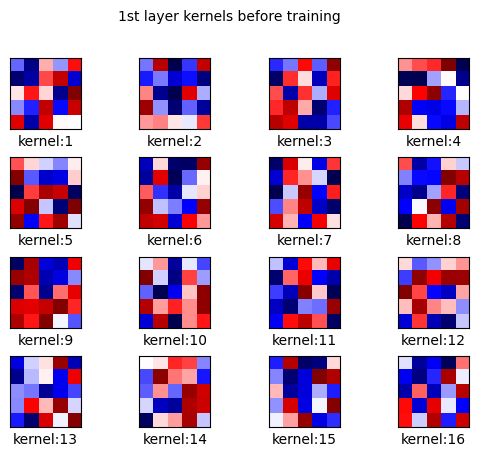

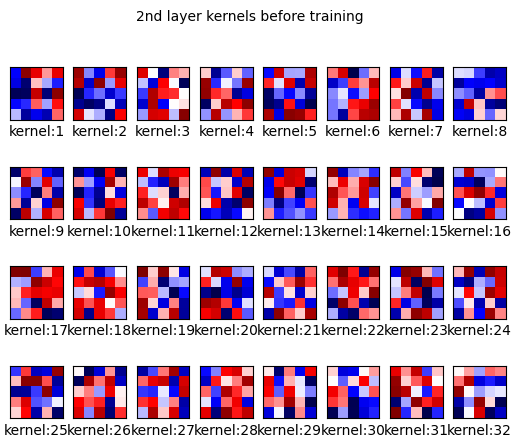

In [110]:
model = CNN(out_1=16, out_2=32)
plot_parameters(model.state_dict()['cnn1.weight'], number_rows=4, name="1st layer kernels before training ")
plot_parameters(model.state_dict()['cnn2.weight'], number_rows=4, name='2nd layer kernels before training' )

In [111]:
train_dataset = ChestXRayDataset(True)
validation_dataset = ChestXRayDataset(False)

4097
4097


In [ ]:
train_dat    = torch.utils.data.TensorDataset(torch.tensor(test_data_x).to(device), torch.tensor(test_data_y).to(device))

In [133]:

train_dataset.X.set_default_dtype(torch.float32)
# train_dataset.X.float()
train_dataset.y.int()
# validation_dataset.X.float()
validation_dataset.X.set_default_dtype(torch.float32)
validation_dataset.y.int()

AttributeError: 'Tensor' object has no attribute 'set_default_dtype'

In [132]:
validation_dataset.X

tensor([[[ 55.,  63.,  69.,  ..., 153., 165., 138.],
         [ 62.,  72.,  81.,  ..., 156., 135., 117.],
         [ 60.,  80.,  89.,  ..., 139., 132., 116.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   1.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   1.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[ 38.,  51.,  56.,  ...,  66.,  46.,  30.],
         [ 37.,  50.,  55.,  ...,  65.,  46.,  30.],
         [ 35.,  51.,  58.,  ...,  63.,  46.,  26.],
         ...,
         [ 15.,  12.,  47.,  ...,  22.,  25.,  24.],
         [ 15.,  12.,  46.,  ...,  23.,  24.,  24.],
         [ 15.,  12.,  46.,  ...,  23.,  24.,  25.]],

        [[  0.,   4.,  31.,  ...,  31.,  19.,   6.],
         [  0.,   2.,  26.,  ...,  39.,  14.,   1.],
         [  0.,   0.,  21.,  ...,  47.,  14.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

In [120]:
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# Create a Data Loader for the training data with a batch size of 100 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# Create a Data Loader for the validation data with a batch size of 5000 
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=500)

In [130]:
# Train the model

# Number of times we want to train on the taining dataset
n_epochs=3
# List to keep track of cost and accuracy
cost_list=[]
accuracy_list=[]
# Size of the validation dataset
N_test=len(validation_dataset)

# Model Training Function
def train_model(n_epochs):
    # Loops for each epoch
    for epoch in range(n_epochs):
        # Keeps track of cost for each epoch
        COST=0
        # For each batch in train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value

            print(x)
            break
            z = model(x)
            # Measures the loss between prediction and acutal Y value
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Cumulates loss 
            COST+=loss.data
        
        # Saves cost of training data of epoch
        cost_list.append(COST)
        # Keeps track of correct predictions
        correct=0
        # Perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            # Makes a prediction
            z = model(x_test)
            # The class with the max value is the one we are predicting
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual value
            correct += (yhat == y_test).sum().item()
        
        # Calcualtes accuracy and saves it
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

tensor([[[  4.,   3.,   3.,  ...,  19.,   0.,   1.],
         [  3.,   3.,   3.,  ...,   4.,   0.,   0.],
         [  3.,   3.,   2.,  ...,   0.,   1.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[  0.,  13.,  45.,  ...,  89.,  86.,  83.],
         [  4.,  30.,  62.,  ..., 101.,  99.,  96.],
         [ 17.,  50.,  69.,  ..., 107., 101.,  99.],
         ...,
         [  0.,   0.,   1.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[ 20.,  20.,  20.,  ...,  20.,  20.,  20.],
         [ 19.,  20.,  20.,  ...,  20.,  20.,  20.],
         [ 19.,  20.,  20.,  ...,  19.,  19.,  20.],
         ...,
         [  3.,  20.,  20.,  ...,  20.,  20.,  20.],
         [  2.,  20.,  21.,  ...,  20.,  20.,  20.],
         [  2.,  20.,  21.,  ...,  20.,  20.,  20.]],

RuntimeError: Input type (double) and bias type (float) should be the same